## Esercitazione 5  del    19 Marzo 2024 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [16]:
import numpy as np
#q = np.arange(10**(-1), 10**(-10))
#q = np.array([10**(-i) for i in range(11)])
#x = np.array([-10**5 + (10**10 + i)**(1/2) for i in q])

p = 10.0**5
q = 10.0**(-np.arange(11))
x = -p+np.sqrt(p**2 + q)
x1 = q/(p+np.sqrt(p**2 + q))

print(x)
print("x1 = ", x1)
print("spacing: ", np.spacing(p**2)) # il minimo che devo sommare per andare alla prossima quantità
print("q= ", q) # da 1**-7, la precisione della macchina non è più in grado di captare la differenza e quindi approssima a 0 direttamente.

[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
x1 =  [5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]
spacing:  1.9073486328125e-06
q=  [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]


## Esercizio 2


Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

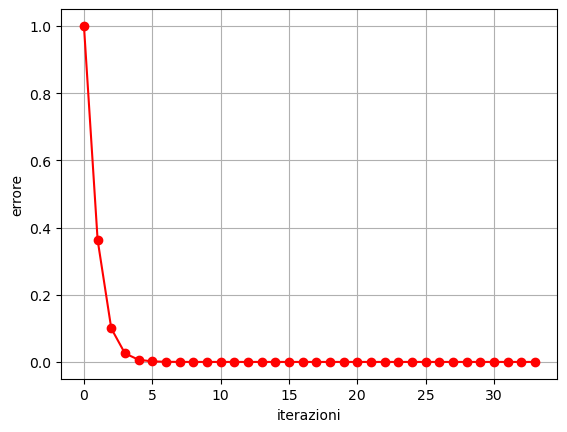

res di pi_fun:  [0.         2.         2.82842712 3.06146746 3.12144515 3.13654849
 3.14033116 3.14127725 3.1415138  3.14157294 3.14158773 3.14159142
 3.14159235 3.14159258 3.14159263 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265]
errore: [1.00000000e+00 3.63380228e-01 9.96836838e-02 2.55046416e-02
 6.41314886e-03 1.60560696e-03 4.01546850e-04 1.00395784e-04
 2.50995129e-05 6.27491367e-06 1.56873063e-06 3.92182797e-07
 9.80457077e-08 2.45114274e-08 6.12785681e-09 1.53196420e-09
 3.82991086e-10 9.57477008e-11 2.39368545e-11 5.98410761e-12
 1.49585021e-12 3.73750515e-13 9.31549127e-14 2.28999937e-14
 5.37160346e-15 9.89505901e-16 1.41357986e-16 4.24073958e-16
 5.65431943e-16 5.65431943e-16]


In [62]:
import math
import matplotlib.pyplot as plt
def pi_fun(n):
    b = np.zeros(n)
    s = np.zeros(n)
    p = np.zeros(n)
    b[0] = 2
    s[0] = 1
    for i in range(1,n):
        p[i]=b[i-1]*s[i-1]
        b[i]=2*b[i-1]
        #s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0) # versione "errata"
        s[i]=math.sqrt((s[i-1]**2)/(2*(1+math.sqrt(1-s[i-1]**2)))) # Versione "revisionata"
        #plt.plot(np.arange(1,n),p[1:n])
        
    return(p)

plt.plot(np.abs((math.pi-pi_fun(34))/(math.pi)), 'r-o')
plt.grid(True)
plt.xlabel('iterazioni')
plt.ylabel('errore')
plt.show()

print("res di pi_fun: ", pi_fun(30))
print("errore:", np.abs((math.pi-pi_fun(30))/(math.pi)))

## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# N sono i valori che vogliamo dentro l'array
# x è il valore che varia da [-10,10]

all_x = [x for x in range(-10,10+1)]
#print(all_x)

N = 100
s = []
tmp = 0
# il tmp è una variabile che raccoglie le somme di ogni elemento
# e poi si azzera
for x in all_x:
    # l'elemento x fa parte del range da -10 a 10
    
    for i in range(N):
        tmp += (x**(i))/(math.factorial(i))
    s.append(tmp)
    tmp = 0
    
print(s)

[4.5399929433607724e-05, 0.00012340980401177225, 0.00033546262785295135, 0.0009118819655660274, 0.0024787521766645613, 0.006737946999086907, 0.018315638888734442, 0.049787068367863986, 0.13533528323661276, 0.36787944117144245, 1.0, 2.7182818284590455, 7.389056098930649, 20.08553692318766, 54.598150033144265, 148.41315910257657, 403.4287934927351, 1096.6331584284578, 2980.957987041728, 8103.083927575384, 22026.46579480671]


## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?
